## Numerical Recipes Workshop 1

For the week of 25 September to 1 October, 2023

**Please submit your notebook via Noteable by Friday evening

**IMPORTANT!** Before submitting your notebook, clear the output by clicking *Restart & Clear Output* from the *Kernel* menu. If you do not do this, the file size of your notebook will be very large.

### Learning Objectives
- Refresh of Python basics and best practices
- Integer and floating point precision
- NumPy basics
- Plotting with matplotlib
    - basic plots
    - multi-panel plots
- Interpolation

Please complete the workshop notebook before beginning on the checkpoint. **The workshop notebooks demonstrate everything you need to complete the checkpoints.**

## Documentation

Below are links to documentation for the versions of modules on Noteable.

* Python: https://docs.python.org/3.9/
* NumPy: https://numpy.org/doc/1.21/
* SciPy: https://docs.scipy.org/doc/scipy/reference/
* matplotlib: https://matplotlib.org/stable/index.html

Advice: google is really helpful (e.g. "numpy trapezoid rule")

# Jupyter notebook essentials


The notebook consists of code blocks and text blocks. 

To execute the code block use 'Run' button at the top, or press 'Shift'+'Enter'

## Python/package Versions

It's good to know what versions of Python and various packages you're using. Answers can be different or known bugs may exist in specific versions.

Use sys package for Python version. Most external packages have a `__version__` attribute associated with the top level import.

In [2]:
# Python version
import sys
print(sys.version)
# Scipy version
import scipy
print(scipy.__version__)
# Try numpy and matplotlib

3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
1.9.3


## The two most useful functions in Python

* `dir` - list all names (variables, functions, etc) in the given scope, i.e., what's in here? Try the following:
```
# top level name space
dir()
x = 1
dir()
```
```
import sys
# contents of the sys module
dir(sys)
```

* `help` - show documentation for a function or object.
```
import numpy as np
help(np.sum)
```


### Use `dir` to see what's in the NumPy module. Pick a random function and see what it does.


### Challenge: create an array of values 0, 2, 4, ... 12 

The resulting array should be:
```
array([[ 0,  2,  4,  6,  8, 10, 12]])
```
Hint: check out the `arange` NumPy functions.


In [7]:
import numpy as np
ar = np.arange(0,14,2)
print(ar)

[ 0  2  4  6  8 10 12]


# Getting help in jupyter/ipython


An alternative way of getting help on functions/modules/variables is a question mark 

```
? scipy 
? np.sum
```

Try it!

## Best Practices

* Put module imports at the top in the first code cell.
* Rename modules to keep names short.
```
# Too long!
import numpy
x = numpy.arange(10)
```
```
# Much better
import numpy as np
x = np.arange(10)
```
* Avoid `from MODULE import *`. Every available object will be in your namespace.
```
from scipy import *
dir() # aaah!
```
* Be careful with variable names. Just about everything can be overwritten.
```
dir = 5
dir()
# The dir function is now lost. Doom.
```
* Use tab completion to recall function/object names. Start typing something and hit the [tab] key a couple times to bring up a menu of matching options. Use this in the terminal, too. Don't waste time typing long names.
```
np.su[tab][tab]
```
* **If things are getting messy,** restart the kernel using one of the *Restart* commands in the *Kernel* menu. This will reset your session, removing bad imports and extra variables.
* **Cell taking too long to run?** From *Kernel* menu, click *Interrupt* to stop execution. Have a look at the traceback to see where the code was. This can give a hint as to why it's taking so long.
* **Keep it neat.** Someone is most likely going to have to read your code someday. It should look nice, be clear, and conform to the style of code that was already there.
* **Your notebook should always run correctly without running cells more than once or out of order.** You can check this by clicking *Restart & Run All* from the *Kernel* menu.

### Plotting tips
* add `%matplotlib inline` your import cell to get plots to show up in the notebook
```
from matplotlib import pyplot as plt
%matplotlib inline
```
* add the following in a separate cell to make default plot and font sizes bigger
```
pyplot.rcParams['figure.figsize'] = (10, 6) # inches
pyplot.rcParams['font.size'] = 14
```

## More Best Practices: Organizing Your Code

It is a good idea to split up your code between multiple cells such that each cell represents a single, logical step, e.g., a cell for module imports, defining a function, making a plot. This can be very helpful for debugging and reusing code.

### Not great code organization

The cell below does every step of the computation. If there are bugs anywhere in the cell, the whole cell won't run and debugging will be a pain. As well, imagine `my_function` takes a long time to calculate and you want tweak your plot over and over. You will be needlessly waiting for calculations to be done over and over again.

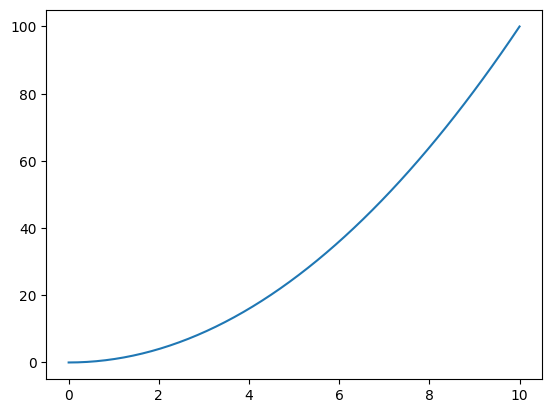

In [8]:
from matplotlib import pyplot as plt
import numpy as np

def my_function(x):
    return x**2

my_x = np.linspace(0, 10)
my_y = my_function(my_x)

plt.plot(my_x, my_y)
plt.show()

### Better code organization

Below, we break the same code up into cells for imports, function definitions, the main code execution, and plotting the result. If anything goes wrong, it is much easier to isolate the section that is broken. As well, if `my_function` takes a long time to run, we can re-run the plotting cell over and over without having to wait.

In [9]:
### imports
from matplotlib import pyplot as plt
import numpy as np

In [10]:
### function definitions
### one function per cell is a good idea
def my_function(x):
    return x**2

In [11]:
### main code execution
my_x = np.linspace(0, 10)
my_y = my_function(my_x)

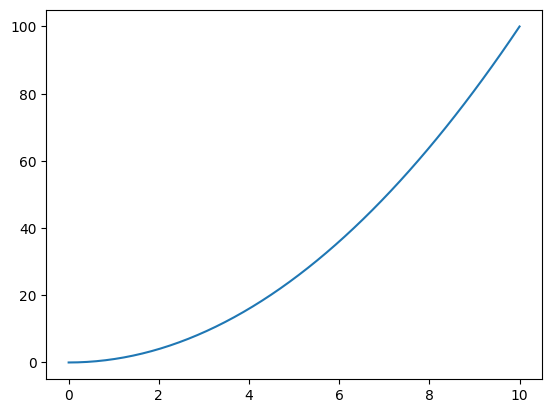

In [12]:
### plotting results
plt.plot(my_x, my_y)
plt.show()

# Activities

## Integer and floating point precision
Not all programming languages have fancy [arbitrary precision integers](https://rushter.com/blog/python-integer-implementation/). NumPy arrays of integers and floats will have limited precision.

#### Integer types
* `np.int8`, `np.int16`, `np.int32`, `np.int64`
* `np.uint8`, `np.uint16`, `np.uint32`, `np.uint64`

#### Floating point types
* `np.float16`, `np.float32`, `np.float64`, `np.float128`

Use the `np.iinfo` (for ints) and `np.finfo` (for floats) commands to see the limitations of some of these variable types, i.e. what do you get from `np.iinfo(np.int32)`?

In [13]:
import numpy as np

See what happens when an upper or lower limit is exceeded. Try a few different types.

In [14]:
x = np.array([125, 126, 127], dtype=np.int8)
print(x)
x += 1
print(x)

[125 126 127]
[ 126  127 -128]


Floating point numbers have limited resolution; they can only store accurately 
certain number of digits.
Try to add different numbers 1E-2, 1E-3, ..., 1E-8 to the array below
and see the results, and observe when the addition stops being exact.
Note that I had to manually specify float32, as by default numpy uses 64 bit floating points

In [18]:
y = np.array([1000, 100, 10, 1, 0.1], dtype=np.float32)

print (y + np.array(1e-2, dtype=np.float32))

# YOUR CODE HERE
print(y + 1e-2)
print(y + 1e-3)
print(y + 1e-4)
print(y + 1e-5)
print(y + 1e-6)
print(y + 1e-7)
print(y + 1e-8)

[1.00001e+03 1.00010e+02 1.00100e+01 1.01000e+00 1.10000e-01]
[1.00001e+03 1.00010e+02 1.00100e+01 1.01000e+00 1.10000e-01]
[1.000001e+03 1.000010e+02 1.000100e+01 1.001000e+00 1.010000e-01]
[1.0000001e+03 1.0000010e+02 1.0000100e+01 1.0001000e+00 1.0010000e-01]
[1.0000000e+03 1.0000001e+02 1.0000010e+01 1.0000100e+00 1.0001000e-01]
[1.0000000e+03 1.0000000e+02 1.0000001e+01 1.0000010e+00 1.0000100e-01]
[1.0000000e+03 1.0000000e+02 1.0000000e+01 1.0000001e+00 1.0000010e-01]
[1.0000000e+03 1.0000000e+02 1.0000000e+01 1.0000000e+00 1.0000001e-01]


You can learn what is a typical precision you will get by using `np.finfo` function. 
Make sure you understand the precision, eps, min, max values. 

In [19]:
print(np.finfo('float32'))
print(np.finfo('float64'))

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
smallest_normal = 1.1754944e-38   smallest_subnormal = 1.4012985e-45
---------------------------------------------------------------

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
------------------

Using the `np.finfo` function to find out what is the number of significant digits
the 128-bit floating point type can accurately represent.

In [23]:
# YOUR CODE HERE
print(np.finfo('float128'))

ValueError: data type <class 'numpy.str_'> not inexact

## NumPy arrays: why bother?
NumPy arrays can be manipulated all at once without having to explicitly iterate over each value. NumPy operations are also significantly faster.

In [24]:
import time
# This is the module that has a lot of functions related to 
# time. I.e. sleeping a certain number of seconds, computing current time etc

In [25]:
# with lists
t1 = time.time()

z = list(range(10000000))
for i in range(len(z)):
    z[i] += 1

t2 = time.time()
print("That took %f seconds." % (t2-t1))

That took 1.140587 seconds.


In [26]:
# with arrays
t1 = time.time()

za = np.arange(10000000)
za += 1

t2 = time.time()
print("That took %f seconds." % (t2-t1))

That took 0.026347 seconds.


Numpy arrays are much faster than loops. It also requires less code. So USE numpy arrays!

### Some useful NumPy array generator functions.

* `np.arange`
* `np.linspace`
* `np.logspace`
* `np.ones`, `np.ones_like`
* `np.zeros`, `np.zeros_like`
* `np.meshgrid`

If unsure check documentation on numpy website or use 
? your_function to see the documentation

### Challenge: make the following array in one line:
```
array([1.e-02, 2.e-01, 3.e+00, 4.e+01, 5.e+02])
```
(hint: you need to combine two functions listed above ) 

In [36]:
# YOUR CODE HERE
print(np.logspace(-2, 2, 5, base=10))

[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


# Challenge 

Make a 2d array of with 7 identical rows [0,1,2,3,4,5,6,7,8,9] using np.meshgrid


In [40]:
# YOUR CODE HERE
print(np.meshgrid(np.arange(0,10,1), np.arange(0,7,1))[0])

[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]


# Numpy Indexing/slicing

Here we will look at the basics of numpy indexes. 

We will start from creating a numpy array with elements [10, 20,30 , 40 .... 1000] 

Now use the numpy indexing and slicing https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing
to print

* The last element of an array
* Every third element starting from the second one 
* Elements from tenth to twentith
* Elements in reverse order
* Every element of an array (using slicing)

Remember in numpy indices start from 0.

In [49]:
# YOUR CODE HERE
array = np.arange(10,1010,10)
print(array[-1])
print(array[1:-1:2])
print(array[9:19])
print(array[-1::-1])
print(array[:])

1000
[ 20  40  60  80 100 120 140 160 180 200 220 240 260 280 300 320 340 360
 380 400 420 440 460 480 500 520 540 560 580 600 620 640 660 680 700 720
 740 760 780 800 820 840 860 880 900 920 940 960 980]
[100 110 120 130 140 150 160 170 180 190]
[1000  990  980  970  960  950  940  930  920  910  900  890  880  870
  860  850  840  830  820  810  800  790  780  770  760  750  740  730
  720  710  700  690  680  670  660  650  640  630  620  610  600  590
  580  570  560  550  540  530  520  510  500  490  480  470  460  450
  440  430  420  410  400  390  380  370  360  350  340  330  320  310
  300  290  280  270  260  250  240  230  220  210  200  190  180  170
  160  150  140  130  120  110  100   90   80   70   60   50   40   30
   20   10]
[  10   20   30   40   50   60   70   80   90  100  110  120  130  140
  150  160  170  180  190  200  210  220  230  240  250  260  270  280
  290  300  310  320  330  340  350  360  370  380  390  400  410  420
  430  440  450  460  470  480 

# Indexing by integer arrays

You can access an array with an array of integers to extract specific list of elements

So if X is an array and Y is an integer array then `X[Y]` will be an array of values at indices specified by Y

In [50]:
### Main array
x = np.array([1.1, 1.2, 1.3, 1.4, 1.5, 1.6])
### Array of indices
y = np.array([2, 3, 1])
print(x[y])

[1.3 1.4 1.2]


## Accessing subsets of arrays.

You can use boolean arrays to index numpy arrays.

I.e. if you have an array X and array of booleans Y of same length
`X[Y]` will return the subset of X where Y is true

Since the ~ operator when applied to boolean arrays is a NOT operator (i.e. it changes False ot True and True to False), if you want to return the subset of X where Y is not True this can be done with `X[~Y]`

In [51]:
x = np.arange(10)
y = np.arange(10)**2
z = np.sin(np.arange(10))

print ('the whole z array', z)
print ('the boolean mask', (x+y)<5)
print ('the subset where x+y<5', z[(x+y)<5])
print ('the subset where NOT x+y<5', z[~((x+y)<5)])


the whole z array [ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]
the boolean mask [ True  True False False False False False False False False]
the subset where x+y<5 [0.         0.84147098]
the subset where NOT x+y<5 [ 0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155   0.6569866
  0.98935825  0.41211849]


# Challenge 

Print the numbers from 1 to 100 where sin(x)+cos(x)>1.4

In [54]:
x=np.arange(1,101)

# YOUR CODE HERE
y = np.sin(x) + np.cos(x)
print(x[y > 1.4])

[ 7 26 51 70 95]


# Advantages of boolean arrays of indices

The key benefit of using boolean arrays to deal with subsets of your arrays is that it is much easier to
combined those subsets, as you can combine multiple subsets easily. 


In [56]:
x = np.arange(10)
subset1 = x<7
print ('First subset', x[subset1])
subset2 = x>3
print ('Second subset', x[subset2])
subset3 = subset1 & subset2
print ('Combination of subsets', x[subset3])

First subset [0 1 2 3 4 5 6]
Second subset [4 5 6 7 8 9]
Combination of subsets [4 5 6]


# Multi-dimensional arrays 

You can construct them directly using `np.array`, `np.zeros`, `np.meshgrid` or by using 
calculations with one dimensional arrays and broadcasting https://numpy.org/devdocs/user/basics.broadcasting.html

In [57]:
print (np.array([[1, 2], [3, 4], [5, 6]]))
print (np.zeros((4, 5)))

[[1 2]
 [3 4]
 [5 6]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


# Array shapes

Multi-dimensional arrays have shapes that describe their sizes.
They can be accessed using .shape attribute. 

If an array has shape (3,5) you can think of it as an array of with 3 rows and 5 columns. 
To access i-th row and j-th column you need to use A[i,j]

In [58]:
# Array shapes 
x = np.arange(15).reshape(3,5)
print(x.shape)
print (x)
print (x[1,2])

(3, 5)
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
7


# Creating multi-D arrays on the grid

A useful function is np.meshgrid. it allows you to create multi-dimensional grids/arrays. 
For example if you have an array or x coordinates [2,4,6] and array of y coordinates [1,3,5,7]
This is how you can create the 2d array of coordinates on the grid

In [59]:
x = np.array([2, 4, 6])
y = np.array([1, 3, 5, 7])
X2d, Y2d = np.meshgrid(x,y)
print(X2d)
print(Y2d)

[[2 4 6]
 [2 4 6]
 [2 4 6]
 [2 4 6]]
[[1 1 1]
 [3 3 3]
 [5 5 5]
 [7 7 7]]


Let's use meshgrid to define an array with size of 5 x 7 where i,j-th element is sin(i + 2 * j)

In [60]:
I,J = np.meshgrid(np.arange(5), np.arange(7))
Z = np.sin(I + 2*J)
print (Z)

[[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025 ]
 [ 0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155 ]
 [-0.7568025  -0.95892427 -0.2794155   0.6569866   0.98935825]
 [-0.2794155   0.6569866   0.98935825  0.41211849 -0.54402111]
 [ 0.98935825  0.41211849 -0.54402111 -0.99999021 -0.53657292]
 [-0.54402111 -0.99999021 -0.53657292  0.42016704  0.99060736]
 [-0.53657292  0.42016704  0.99060736  0.65028784 -0.28790332]]


# Broadcasting

Broadcasting is an important concept where you can do numpy operations
with arrays of different shapes and then numpy will either automatically or 
with some 'guidance' will 'broadcast' smaller arrays to the shape of larger 
array.

Now let's try to construct an array using a broadcasting approach. 

If we want an array of 4x5 where i,j-th element is i^3 * j^2 and 0<i<4 0<j<5 

If we try this

`
x=np.arange(4)
y=np.arange(5)
x**3 * y**2
`

it will not work because we can't combine arrays of different lengths.

In [61]:
x = np.arange(4)
y = np.arange(5)

However if you use a special syntax to introduce dimensions of size 1, you should be able to do it
I.e. 
`x[:, np.newaxis]` will make an array with the shape (4,1)
while the `y[np.newaxis, : ]` will make an array of shape (1,5) 
after that you should be able to multiply the arrays and that will make a 4x5 array.

In [62]:
print(x[:,np.newaxis]**3 * y[np.newaxis,:]**2)

[[  0   0   0   0   0]
 [  0   1   4   9  16]
 [  0   8  32  72 128]
 [  0  27 108 243 432]]


# Array reshaping

* If we want to change the shape of the array arr, you can use arr.T to transpose it
* We can use arr.flatten() to convert an array to 1d 
* Or you can use .reshape() method to change an array to a different shape with the same number of elements

In [63]:
x = np.array([[1,2],[3,4],[5,6]])
print(x)
print('Transposed array', x.T)
print('flattened array into 1d', x.flatten())
print('Array reshaped to 6x1', x.reshape(6,1))
print('the shape of the array', x.shape)


[[1 2]
 [3 4]
 [5 6]]
Transposed array [[1 3 5]
 [2 4 6]]
flattened array into 1d [1 2 3 4 5 6]
Array reshaped to 6x1 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
the shape of the array (3, 2)


# Combining arrays

We can also combine several arrays into a larger arrays using `np.concatenate`, `np.tile`, `np.array`, `np.repeat`

In [64]:
x = np.arange(5)
y = np.arange(5)

# this creates 2x5 array
print (np.array([x, y]))
# This creates 1x10 array
print (np.concatenate((x, y)))

[[0 1 2 3 4]
 [0 1 2 3 4]]
[0 1 2 3 4 0 1 2 3 4]


## Basic Plotting
Basic plots can be made using high level commands imported from the `matplotlib.pyplot` module. Some basic plotting commands are given below (assuming the following import `from matplotlib import pyplot as plt`).

Useful plotting commands:
* `plt.plot`
* `plt.semilogx`, `plt.semilogy`
* `plt.loglog`
* `plt.scatter`
* `plt.xlim`, `plt.ylim`
* `plt.xlabel`, `plt.ylabel`
* `plt.legend`
* `plt.title`
* `plt.xscale`, `plt.yscale`
* `plt.show`

Use the `help` function for more information on each.

See [here](https://matplotlib.org/api/pyplot_summary.html) for a list of all plotting commands 

See [here](https://matplotlib.org/stable/plot_types/index.html) for list of all possible types of plots.

**When making plots for checkpoints, always label the axes. Make them look nice.**

### Plotting a Gaussian distribution.

A Gaussian distribution with mean, $\mu$, and variance, $\sigma^2$, takes the form:

$
\begin{align}
\Large
f(x) = \frac{1}{\sqrt{2\pi\sigma^{2}}} e^{-\frac{(x - \mu)^2}{2\sigma^{2}}}
\end{align}
$

In the cell below, write a function that accepts an array of values, `x`, and returns an array representing the Gaussian evaluated for all points in `x`. Note, the text in between the `"""` marks is called a "docstring". See what happens when you do `help(my_gaussian)`.

In [66]:
def my_gaussian(x, mu=0, sigma=1):
    """
    Compute the Gaussian function.
    
    Parameters
    ----------
    x : float or array
        A single value or an array of values for which the Gaussian will be evaluated.
    mu : optional, float
        mean of the Gaussian distribution
    sigma : optional, float
        square root of the variance of the Gaussian distribution
        
    Returns
    -------
    y : array
        values of the Gaussian distribution for all values of x
    """
    # First, delete the line that says "raise NotImplementedError"
# YOUR CODE HERE
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)/sigma)**2)

### Test your function.

Run the cell below to test your function with a few values.

In [67]:
assert (abs(my_gaussian(0) - 0.3989422804014327) < 1e-7)
assert (abs(my_gaussian(1) - 0.24197072451914337) < 1e-7)

In [68]:
### Some matplotlib imports
from matplotlib import pyplot as plt
%matplotlib inline

### Set some plotting defaults.

The lines below can be used to set some sensible defaults for all of your basic plots. You can put these at the top of a notebook.

In [69]:
plt.rcParams['figure.figsize'] = (10, 6) # inches
plt.rcParams['font.size'] = 14

### Plot the Gaussian distribution.


Make a plot of this function over the range [-5, 5] for a couple values of $\mu$ and $\sigma$ with appropriate labels and a legend. Hint, the `label` keyword can be given to the plotting commands to aid in making the legend. Try different combinations of linear and log-space plots.

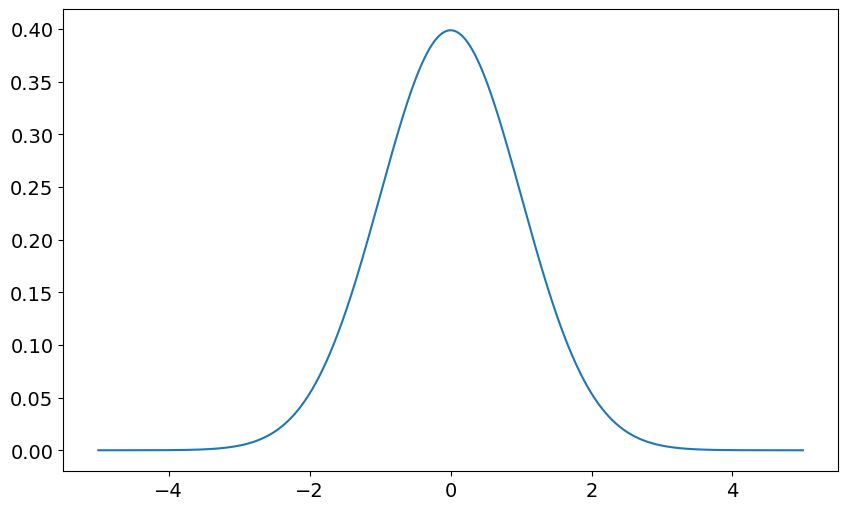

In [72]:
x = np.linspace(-5, 5, 1000)

# YOUR CODE HERE
plt.plot(x, my_gaussian(x, 0, 1))

## Two dimensional plots 
Lets show a two dimensional plot of the 

$z=(x^2+y^2)$

function 
with color indicating the value of z

This can be done with the help of `plt.imshow` function

Lets start by generating a grid of x,y values with the help of np.meshgrid function

In [73]:
# This is now the grid in x from 0 2 and y from 0 to 1 with steps of 0.1
x,y = np.meshgrid(np.arange(0,2,0.1),np.arange(0,1,.1))

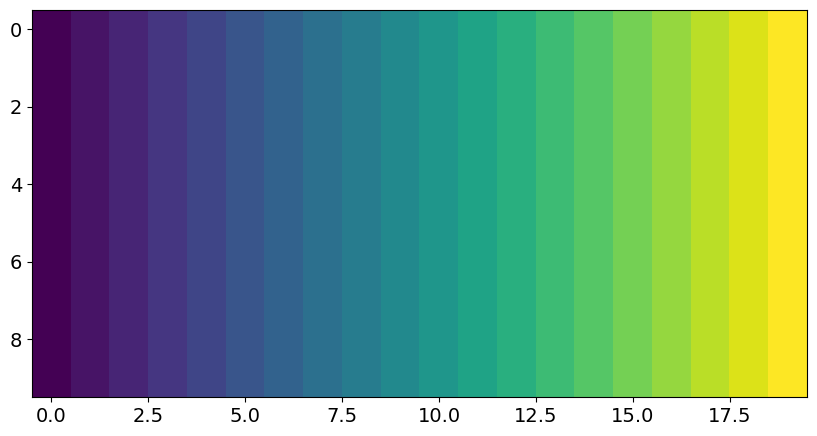

In [74]:
# This is our x
plt.imshow(x)

### Lets add a colour bar

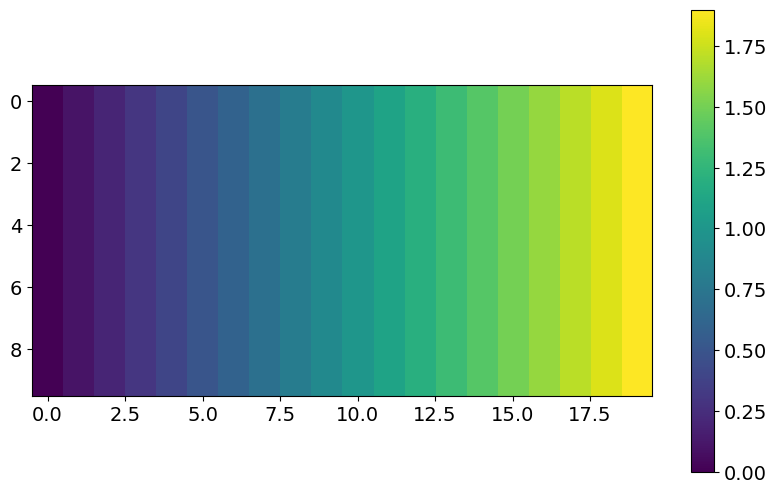

In [75]:
plt.imshow(x)
plt.colorbar()

## Important imshow options

* aspect -- controls the aspect ratio
* origin  can be 'lower' or 'upper' controls where the [0,0] element array will 
be in the lower left or upper left corner
* extent -- controls the axis range 

In the example below we plot the behaviour of $x^2+y^2$ function

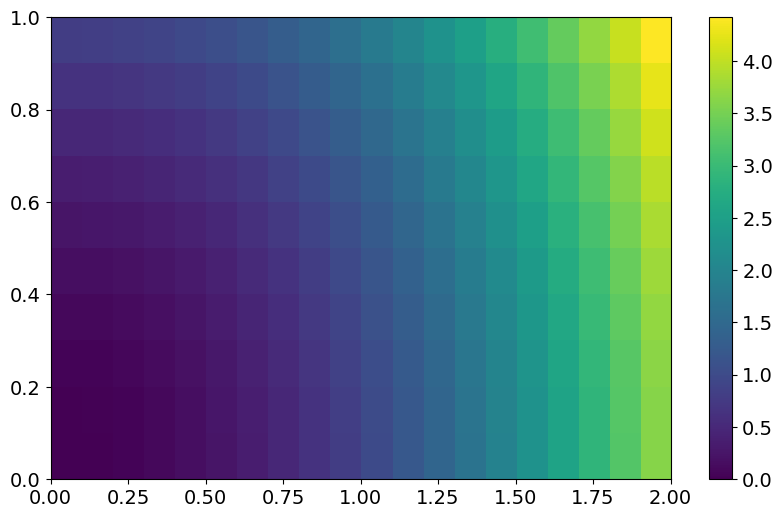

In [76]:
plt.imshow(x**2 + y**2, aspect='auto', extent=(0,2,0,1),origin='lower')
plt.colorbar()

# Interpolation


## Lets implement a simple version of the linear interpolation

We will write a simple function that implement the linear interpolation algorith from the lecture (without relying on scipy.interpolate)

For this we will need two functions `np.argsort` that returns indices to sort the array
and `np.searchsorted` that performs fast search in a sorted array

In [96]:
def lininterp(X, Y, xnew):
    """
    This function does linear interpolation of Y over X and evaluates it 
    on an array xnew. The input X does not have to be sorted
    
    Arguments:
    X numpy array
    Y numpy array 
    xnew numpy array
    
    Returns
    ynew numpy array
         Array with the results of interpolation evaluated at xnew
    """
    ind = np.argsort(X)
    sortedX = X[ind]
    sortedY = Y[ind]
    insert_ind = np.searchsorted(sortedX, xnew)
    ynew = np.zeros(len(xnew))
    for i, val in enumerate(insert_ind):
        ynew[i] = sortedY[val-1] + (sortedY[val] - sortedY[val-1]) / (sortedX[val] - sortedX[val-1]) * (xnew[i] - sortedX[val-1])
# YOUR CODE HERE

    return ynew


In [167]:
def lininterp(X, Y, xnew):
    """
    This function does linear interpolation of Y over X and einsert_induates it 
    on an array xnew. The input X does not have to be sorted
    
    Arguments:
    X numpy array
    Y numpy array 
    xnew numpy array
    
    Returns
    ynew numpy array
         Array with the results of interpolation einsert_induated at xnew
    """
    ind = np.argsort(X)
    sortedX = X[ind]
    sortedY = Y[ind]
    insert_ind = np.searchsorted(sortedX, xnew)
    ynew = sortedY[insert_ind-1] + (sortedY[insert_ind] - sortedY[insert_ind-1]) / (sortedX[insert_ind] - sortedX[insert_ind-1]) * (xnew - sortedX[insert_ind-1])
# YOUR CODE HERE

    return ynew

In [168]:
# test function
lininterp(np.array([1, 3, 2]), np.array([1, 9, 4]), np.array([1.5, 2.5]))

array([2.5, 6.5])

Now let's check our implementation on a linear function y=3*x
If your code is correct the output from your interpolation should match expected output

In [169]:
# Input data
xinput = np.array([0,1,2,3,5,10,9,8,7,6])
yinput = 3 * xinput

# We will evaluate our interpolation function on this array
xeval = np.array([2.5, 9.1, .1])

ypred = lininterp(xinput, yinput, xeval)
print ('Your interpolation', ypred)
print ('The expected output', xeval*3)
assert ((ypred == xeval*3).all())

Your interpolation [ 7.5 27.3  0.3]
The expected output [ 7.5 27.3  0.3]


How will the function behave if xnew is outside our interpolation range ? 

Modify the function to return edge values if input values is outside the range of interpolated data.
The functions `np.maximum`/`np.minimum` or `np.clip` can be useful 

In [116]:
def lininterp_edge(X, Y, xnew):
    """
    This function does linear interpolation of Y over X and
    evaluates on an array xnew. It also correctly deals with the 
    situation when xnew contains points outside the range covered by X
    """
# YOUR CODE HERE
    ind = np.argsort(X)
    sortedX = X[ind]
    sortedY = Y[ind]
    insert_ind = np.searchsorted(sortedX, xnew)
    ynew = np.zeros(len(xnew))
    for i, val in enumerate(insert_ind):
        if val == 0:
            ynew[i] = sortedY[0]
        elif val == len(sortedX):
            ynew[i] = sortedY[-1]
        else:
            ynew[i] = sortedY[val-1] + (sortedY[val] - sortedY[val-1]) / (sortedX[val] - sortedX[val-1]) * (xnew[i] - sortedX[val-1])
    return ynew


In [ ]:
def lininterp(X, Y, xnew):
    """
    This function does linear interpolation of Y over X and einsert_induates it 
    on an array xnew. The input X does not have to be sorted
    
    Arguments:
    X numpy array
    Y numpy array 
    xnew numpy array
    
    Returns
    ynew numpy array
         Array with the results of interpolation einsert_induated at xnew
    """
    ind = np.argsort(X)
    sortedX = X[ind]
    sortedY = Y[ind]
    insert_ind = np.searchsorted(sortedX, xnew)
    ynew = sortedY[insert_ind-1] + (sortedY[insert_ind] - sortedY[insert_ind-1]) / (sortedX[insert_ind] - sortedX[insert_ind-1]) * (xnew - sortedX[insert_ind-1])
# YOUR CODE HERE

    return ynew

Now let's compare our implementation with the one in python
`scipy.interpolate.interp1d`
The curves in the plot below should match exactly

In [100]:
import scipy.interpolate

[ 0.          1.          2.29739671  3.73719282  5.27803164  6.89864831
  8.58581449 10.33041213 12.12573253 13.96661017]


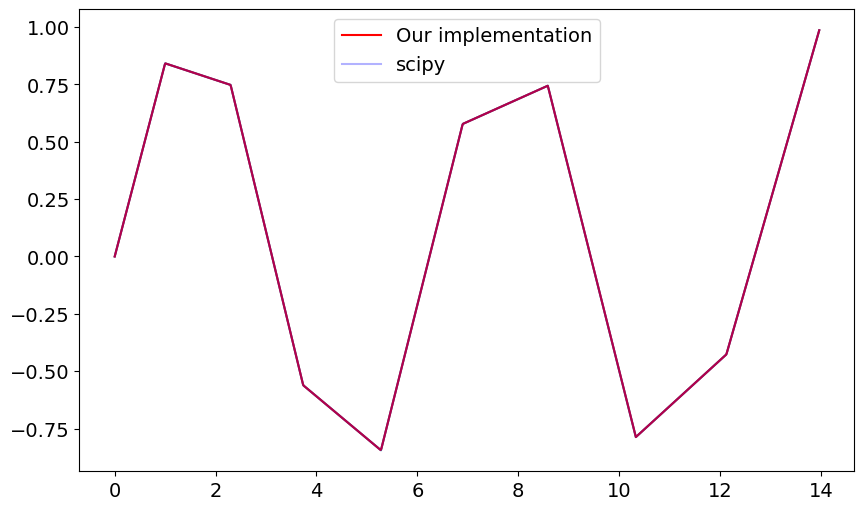

In [179]:
xs = np.arange(10) ** 1.2
print(xs)
ys = np.sin(xs)
xgrid = np.linspace(0,xs[-1],1000)
plt.plot(xs, ys)
plt.plot(xgrid, lininterp_edge(xs, ys, xgrid), 'r', label='Our implementation')
plt.plot(xgrid, scipy.interpolate.interp1d(xs, ys)(xgrid), 'b', label='scipy', alpha=0.3)
plt.legend()

# Spline interpolation

Now we can look at the at the cubic spline interpolations

Those are implemented in `scipy.interpolate.CubicSpline`, `scipy.interpolate.UnivariateSpline` and others

Lets create a simple Cubic interpolator between two arrays (that will mimick the square root function)

[1,2,3,4,5,6,7,8] and [1, sqrt(2), sqrt(3), sqrt(4), sqrt(5), sqrt(6), sqrt(7), sqrt(8)]

In [125]:
x = np.arange(9) + 1
y = np.sqrt(x)
SplineInt = scipy.interpolate.CubicSpline(x, y)

AttributeError: 'CubicSpline' object has no attribute 'shape'

# Challenge

Plot the input data and overplot the spline evaluated on the grid of values from from 1 to 9

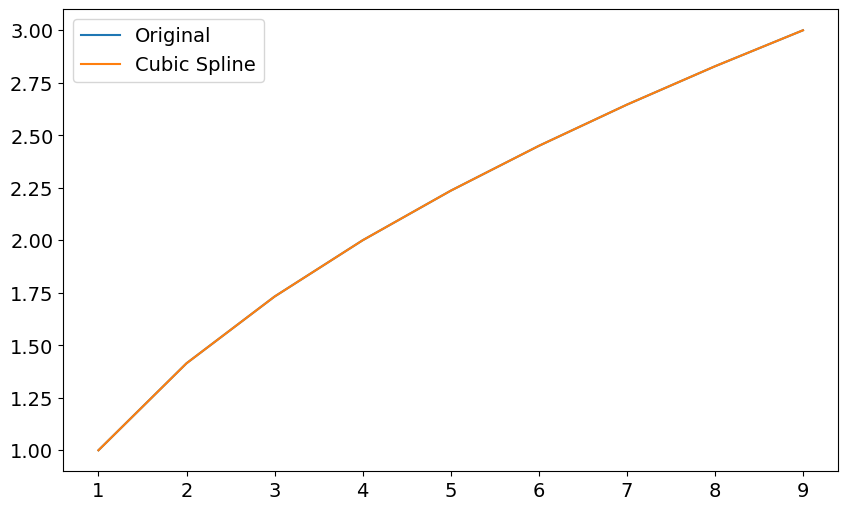

In [128]:
# YOUR CODE HERE
plt.plot(x, y, label='Original')
plt.plot(x, SplineInt(x), label='Cubic Spline')
plt.legend()

Please show the derivative of the interpolator in the range 1<x<8
Use the .derivative method of the interpolator.

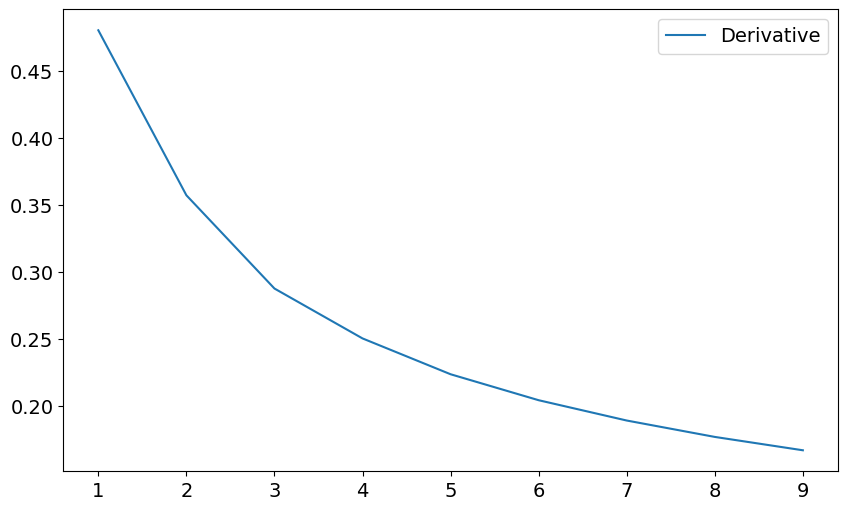

In [131]:
# YOUR CODE HERE
plt.plot(x, SplineInt.derivative()(x), label='Derivative')
plt.legend()

# Smoothing splines

Some interpolation methods allow interpolation functions that do not go through 
all the data, but instead perform additional smoothing.

This can be done with `scipy.interpolate.UnivariateSpline`

Text(0.5, 1.0, 'Data')

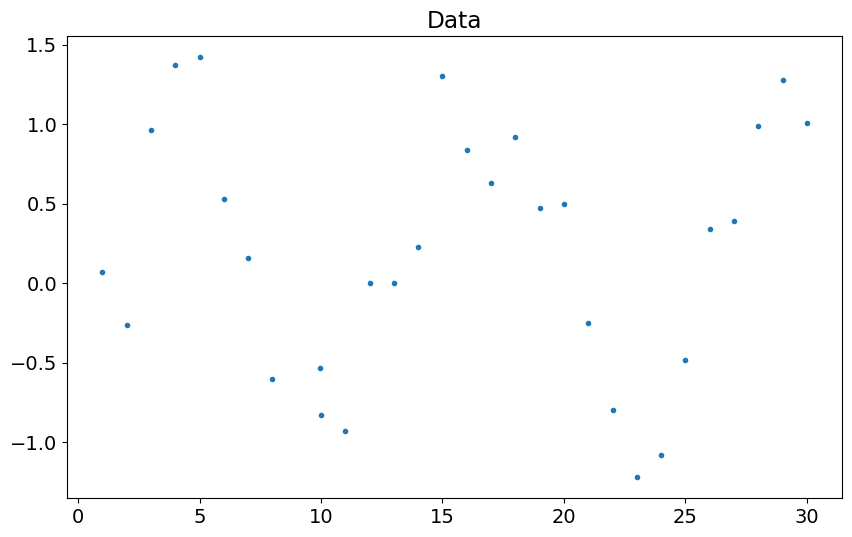

In [132]:
xdat1 = np.r_[1, 2, 3, 4, 5, 6, 7, 8, 9.98, 10, 11, 12, 13, 14, 15, 16, 17, 18,
              19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
ydat1 = np.r_[0.07, -0.26, 0.96, 1.37, 1.42, 0.53, 0.16, -0.60, -0.53, -0.83,
              -0.93, 0.00, -0.00, 0.23, 1.30, 0.84, 0.63, 0.92, 0.47, 0.50,
              -0.25, -0.80, -1.22, -1.08, -0.48, 0.34, 0.39, 0.99, 1.28, 1.01]
plt.plot(xdat1, ydat1, '.')
plt.title('Data')

Now trying smoothing splines `scipy.interpolate.UnivariateSpline` with different values of smoothing parameter

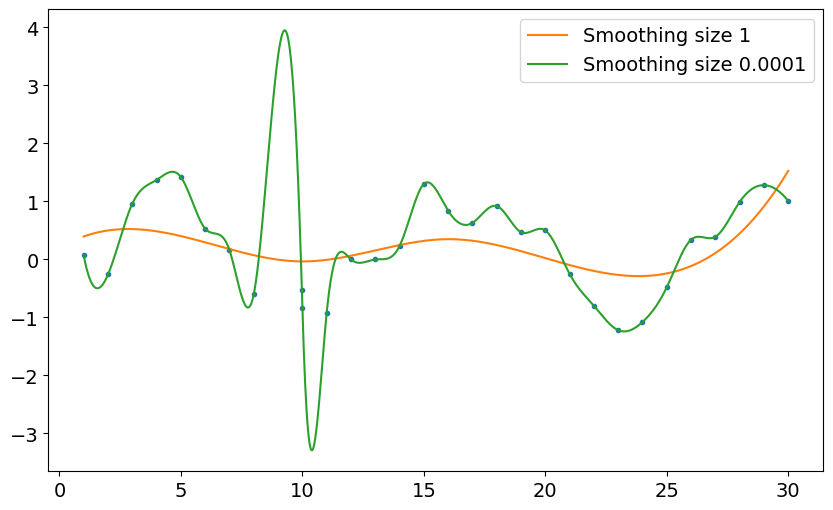

In [133]:
xgrid = np.linspace(1,30,1000)
plt.plot(xdat1, ydat1, '.')
SplineInt10 = scipy.interpolate.UnivariateSpline(xdat1, ydat1, s=10)
SplineInt_001 = scipy.interpolate.UnivariateSpline(xdat1, ydat1, s=.0001)

plt.plot(xgrid, SplineInt10(xgrid),label='Smoothing size 1')
plt.plot(xgrid, SplineInt_001(xgrid),label='Smoothing size 0.0001')
plt.legend()

# Challenge 

Try to vary the smoothing parameter. Choose the one that you think works best. Plot the result.

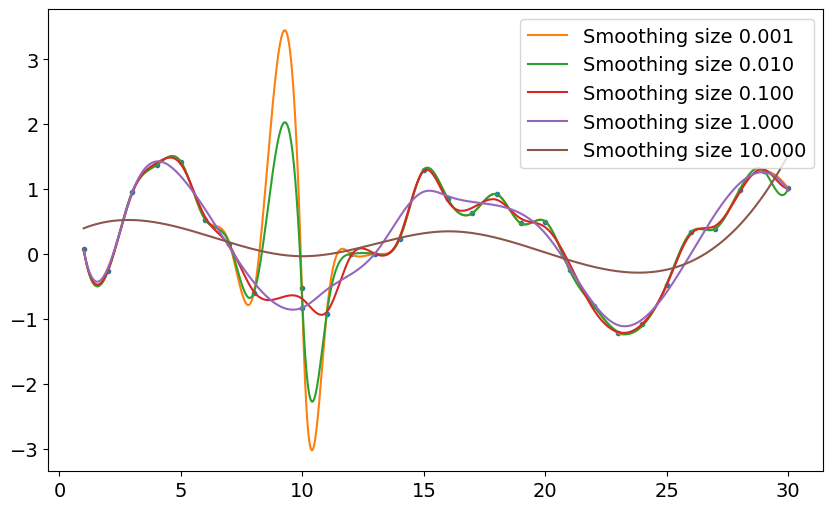

In [141]:
# YOUR CODE HERE
xgrid = np.linspace(1,30,1000)
plt.plot(xdat1, ydat1, '.')

smoothing_samples = np.logspace(-3, 1, 5, base=10)
for s in smoothing_samples:
    SplineInt = scipy.interpolate.UnivariateSpline(xdat1, ydat1, s=s)
    plt.plot(xgrid, SplineInt(xgrid), label=f'Smoothing size {s:.3f}')
plt.legend()

## How can we decide which interpolation is better ? 

We can use the cross-validation method
We can split the data into two (or more) subsets  
We can interpolate the over the part of the data and evaluate the square deviation of the prediction 
over the left-over part.

In [142]:
def evaluate_predictitions_spline(x, y):
    """
    Here we test the predictive abilities of the spline 
    By splitting the data into 3 chunks and returning the 
    mean square deviations for a given interpolator
    """
    nsplit = 3 
    N = len(x)
    pos = np.arange(len(x))
    ret = 0 
    for i in range(nsplit):
        testsubset = pos%nsplit ==i 
        fitsubset = ~testsubset 
        curx = x[fitsubset]
        cury = y[fitsubset]
        testx = x[testsubset]
        testy = y[testsubset]
        Int = scipy.interpolate.UnivariateSpline(curx, cury, s=.2)
        ret = ret + np.mean((Int(testx) - testy)**2)
    ret =ret/nsplit
    return ret

print ('Mean square error', evaluate_predictitions_spline(xdat1,ydat1))

Mean square error 0.281007466673805


# Multivariate Interpolation (optional)

Here we explore multi-variate interpolation.

Importantly the interpolator classes accept two arguments, one is an array of N-dimensional coordinates and another is 1-D array of values.

For example 

`scipy.interpolate.LinearNDInterpolator(
            np.array([[1,3], [3,4], [1,2], [5,6]]), 
            np.array([13, 14, 15, 16]))`
            

When passing input arrays to these interpolators you may need to reshape them 

For this test we define input data as an array defined on a grid of step 1 from 0 to 9 in x and y 
and `z = sin(x+2*y)`

Wee then show the results of interpolation of z on a grid with the step of 0.1
`scipy.interpolate.LinearNDInterpolator` and `scipy.interpolate.NearestNDInterpolator` and 
`scipy.interpolate.RbfInterpolator`

The shape of the input array is  (400, 2)


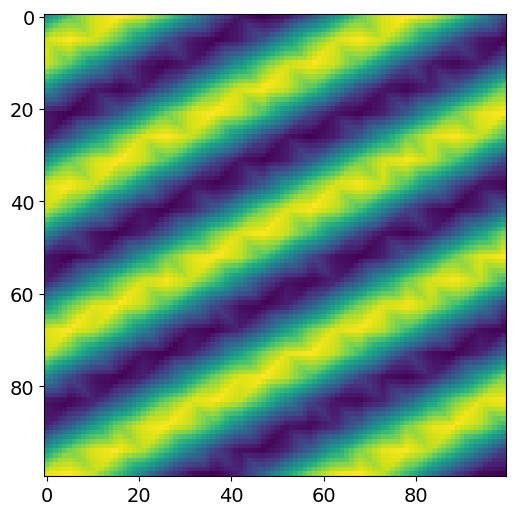

In [146]:
x,y = np.meshgrid(np.linspace(0,10,20),np.linspace(0,10,20))
z = np.sin(x + 2*y)

# this is an array with the shape 2,X 
X2D = np.array([x.flatten(), y.flatten()]).T  

print ('The shape of the input array is ', X2D.shape)

LinNDInt = scipy.interpolate.LinearNDInterpolator(X2D, z.flatten())
xgrid, ygrid = np.meshgrid(np.linspace(0,10,100),np.linspace(0,10,100))

IntPred = LinNDInt(xgrid, ygrid)
plt.imshow(IntPred)

# Challenge
Now perform and show the interpolation using NearestNDInterpolator

The shape of the input array is  (400, 2)
[[ 0.         0.1010101  0.2020202 ...  9.7979798  9.8989899 10.       ]
 [ 0.         0.1010101  0.2020202 ...  9.7979798  9.8989899 10.       ]
 [ 0.         0.1010101  0.2020202 ...  9.7979798  9.8989899 10.       ]
 ...
 [ 0.         0.1010101  0.2020202 ...  9.7979798  9.8989899 10.       ]
 [ 0.         0.1010101  0.2020202 ...  9.7979798  9.8989899 10.       ]
 [ 0.         0.1010101  0.2020202 ...  9.7979798  9.8989899 10.       ]]


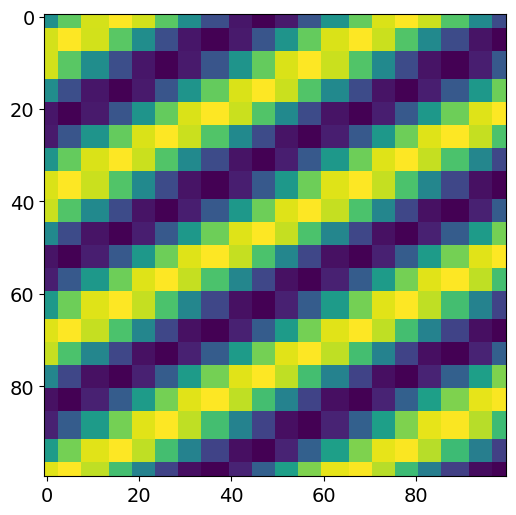

In [156]:
# YOUR CODE HERE
x,y = np.meshgrid(np.linspace(0,10,20),np.linspace(0,10,20))
z = np.sin(x + 2*y)

# this is an array with the shape 2,X 
X2D = np.array([x.flatten(), y.flatten()]).T  

print ('The shape of the input array is ', X2D.shape)

NearestNDInt = scipy.interpolate.NearestNDInterpolator(X2D, z.flatten())

xgrid, ygrid = np.meshgrid(np.linspace(0,10,100),np.linspace(0,10,100))

print(xgrid)

IntPred = NearestNDInt(xgrid, ygrid)
plt.imshow(IntPred)

# Challenge

Now show the interpolation using Radial basis function interpolator RBFInterpolator.

Tip: When evaluating the RBFInterpolator it requires a single N x Ndim array rather than Ndim arrays

The shape of the input array is  (400, 2)


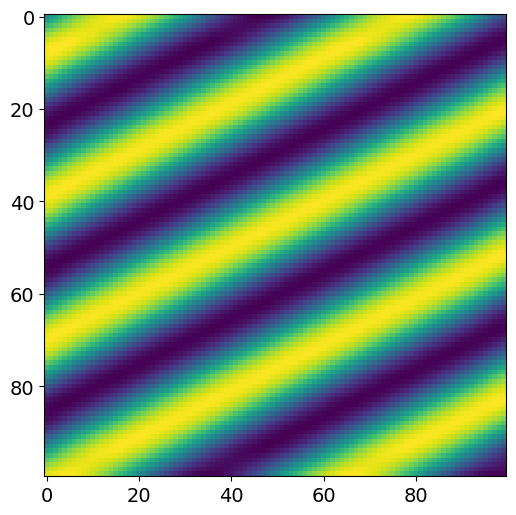

In [164]:
# YOUR CODE HERE
x,y = np.meshgrid(np.linspace(0,10,20),np.linspace(0,10,20))
z = np.sin(x + 2*y)

# this is an array with the shape 2,X 
X2D = np.array([x.flatten(), y.flatten()]).T  

print ('The shape of the input array is ', X2D.shape)

RBFNDInt = scipy.interpolate.RBFInterpolator(X2D, z.flatten())

xgrid, ygrid = np.meshgrid(np.linspace(0,10,100),np.linspace(0,10,100))
output_grid = np.array([xgrid.flatten(), ygrid.flatten()]).T

IntPred = RBFNDInt(output_grid).reshape(xgrid.shape)

plt.imshow(IntPred)

### You made it!

Congratulations! Make sure to submit your notebook to get credit and don't forget to clear the output first.